## 1. Complexidade de algoritmos

Na nossa vida vamos ver diversos tipos de algoritmos que resolvem o mesmo problema e, muitas vezes, vamos nos perguntar: Qual desses algoritmos é melhor? Qual eu devo usar?

Então, surge uma nova dúvida: Como avalio se um algoritmo é melhor que outro? Que critérios eu posso usar?

### Possíveis critérios para comparação

- Tempo de execução
- Memória necessária
- Facilidade de manutenção e teste
- Possibilidade de paralelizar
- etc

Em geral, **tempo de execução** e **memória utilizada** são os mais importantes para comparação. Mas, como calculamos esses valores?

### Complexidade de tempo

Vamos para um exemplo:

In [14]:
# Quantas operações (vezes que passamos por cada linha) nos temos?

def soma(lista):     # Lista de tamanho n
    soma = 0         # 1
    for el in lista: # (n+1)
        soma += el   # n
    return soma      # 1

Ou seja:

$$T(n) = c(1 + (n+1) + n + 1) = c(2n + 3) \text{ , onde:}$$  
- $\text{T é nossa função do tempo}$
- $\text{c é o custo de cada instrução}$

[[1,2,3],
 [3,4,5],
 [6,7,8]]

In [36]:
## E agora? Imagine que temos uma matriz quadrada n*n
def imprimir_matriz(matriz):
    for linha in matriz: # (n + 1)
        for j in linha:  # n * (n + 1)
            print(j)     # n * n

In [4]:
for_interno = 0
for_externo = 0
for i in range(3): #for externo
    for_externo += 1
    for j in range(4): #for interno n*(n+1)
        for_interno +=1 # 3 * 4

In [5]:
for_externo, for_interno

(3, 12)

Ou seja:

$$T(n) = c((n+1) + n^2 + n + n^2) = c(2n^2 + 2n) \text{ , onde:}$$  

Mas precisamos ser tão detalhistas assim, a ponto de contar a execução de cada linha?

In [6]:
import seaborn as sns

%matplotlib inline

In [11]:
func1 = lambda x: 2 * x + 3
func2 = lambda x: x
func3 = lambda x: 2*x**2 + 2*x 
resultados1 = []
resultados2 = []
resultados3 = []

for i in range(0, 1000000, 100):
    resultados1.append(func1(i))
    resultados2.append(func2(i))
    resultados3.append(func3(i))

<AxesSubplot:>

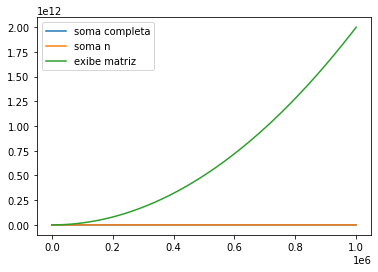

In [12]:
sns.lineplot(x=range(0, 1000000, 100), y=resultados1, label='soma completa')
sns.lineplot(x=range(0, 1000000, 100), y=resultados2, label='soma n')
sns.lineplot(x=range(0, 1000000, 100), y=resultados3, label='exibe matriz')

Ou seja, as **constantes** e os **fatores de menor ordem** NÃO são dominantes para entradas grandes. Devemos prestar atenção na **ordem de crescimento** (maior fator).

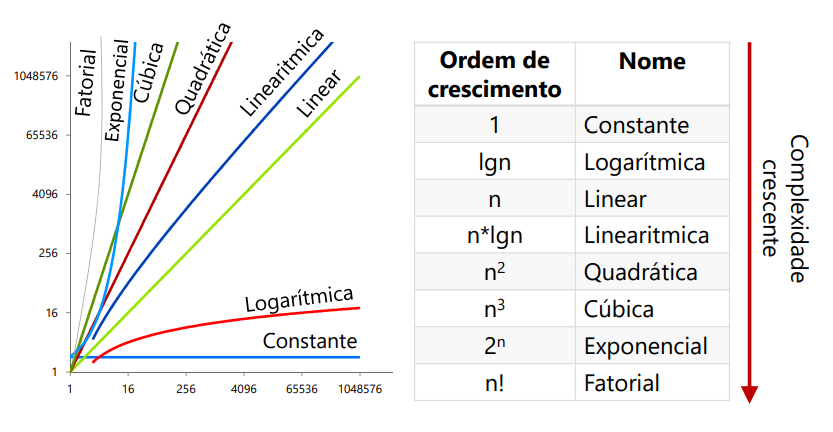

### Big-O

É uma das notações assintóticas (quando analisamos olhando para o infinito) e é a mais usada na indústria pois as empresas estão sempre querendo trazer a opção mais rápida.

Está apenas preocupada com a taxa de crescimento (maior fator).

Pode ser usada para analisar o pior caso, o melhor caso e o caso médio. No geral, focaremos no **pior caso**, uma vez que ele é onde nosso sistema terá o maior gargalo.

Mas o que muda? É apenas a notação. Para os exemplos acima escreveriamos dessa forma:

- soma: O(n)
- imprimir_matriz: O(n²)

### Complexidade de espaço

É o quanto de memória "adicional" estamos usando para efetuar nosso código. Por exemplo, se precisamos criar uma lista auxiliar de tamanho n, então, nossa complexidade de espaço é O(n).

## 2. Ordenação

Existem diversos algoritmos de ordenação:

- **Bubble sort**
- Selection sort
- Insertion sort
- **Mergesort**
- **Quicksort**
- Heapsort
- Shellsort
- Cocktailsort
- etc

Vamos ver os que estão em negrito!

In [21]:
import random

### Bubble sort

In [24]:
def bubble_sort(lista):
    for i in range(len(lista) - 1):
        for j in range(len(lista) - 1 - i):
            ## Procurando pelo maior elemento de 0 até n-i
            if lista[j] > lista[j+1]:
                lista[j], lista[j+1] = lista[j+1], lista[j]
    return lista

In [29]:
print(bubble_sort([1,2,3,0,4,7,5,6]))
print(bubble_sort([random.randrange(20) for i in range(30)]))

[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 7, 8, 8, 8, 9, 9, 10, 10, 11, 12, 12, 13, 14, 15, 16, 17, 18, 18, 19]


**Complexidade de tempo:** O(n²) $\rightarrow$ Temos um laço aninhado

### Merge sort

**meio** é como se fosse a media do inicio e fim

In [1]:
## Implementação aula
def mergesort(lista, inicio, fim):
    
    # Continuidade
    if not (fim - inicio <= 1):
        meio = (inicio + fim) // 2
        
        # chamando lado esquerdo
        mergesort(lista, inicio, meio)
        
        # chamando o lado direito
        mergesort(lista, meio, fim)
        
        merge(lista, inicio, meio, fim)
        
        return lista
        

def merge(lista, inicio, meio, fim):
    
    lista_esquerda = lista[inicio:meio]
    lista_direita = lista[meio:fim]
    
    i = 0
    j = 0
    
    for list_index in range(inicio, fim):
        if i >= len(lista_esquerda):
            lista[list_index] = lista_direita[j]
            j += 1
        
        elif j >= len(lista_direita):
            lista[list_index] = lista_esquerda[i]
            i += 1
            
        elif lista_esquerda[i] <= lista_direita[j]:
            lista[list_index] = lista_esquerda[i]
            i += 1
        elif lista_direita[j] < lista_esquerda[i]:
            lista[list_index] = lista_direita[j]
            j += 1

In [2]:
## Feito em casa
def mergesort(lista, inicio=0, fim=None):
    if fim is None:
        fim = len(lista)
    
    if (fim - inicio) > 1:
        meio = (fim + inicio) // 2
        mergesort(lista, inicio, meio)
        mergesort(lista, meio, fim)
        merge(lista, inicio, meio, fim)
        return lista

def merge(lista, inicio, meio, fim):
    esquerda = lista[inicio:meio]
    direita = lista[meio:fim]
    
    i = 0
    j = 0
    
    for list_index in range(inicio, fim):
        if i >= len(esquerda):
            lista[list_index] = direita[j]
            j += 1
        elif j >= len(direita):
            lista[list_index] = esquerda[i]
            i += 1 
        elif esquerda[i] <= direita[j]:
            lista[list_index] = esquerda[i]
            i += 1
        else:
            lista[list_index] = direita[j]
            j += 1

In [47]:
mergesort([1,2,3,0,4,7,5,6, 2], inicio = 0, fim=len([1,2,3,0,4,7,5,6, 2]))

[0, 1, 2, 2, 3, 4, 5, 6, 7]

### Quick sort

In [11]:
def quicksort(lista, inicio=0, fim=None):
    if fim is None:
        fim = len(lista) - 1
    if (fim - inicio) > 0:
        idx = partition(lista, inicio, fim)
        quicksort(lista, inicio, idx-1)
        quicksort(lista, idx+1, fim)
        return lista

def partition(lista, inicio, fim):
    sep = inicio
    pivo = lista[fim]
    for i in range(inicio, fim):
        if lista[i] < pivo:
            lista[i], lista[sep] = lista[sep], lista[i]
            sep += 1
    lista[sep], lista[fim] = lista[fim], lista[sep]
    return sep

In [12]:
print(quicksort([1,2,3,0,4,7,5,6]))
print(quicksort([random.randrange(20)for i in range(30)]))

[0, 1, 2, 3, 4, 5, 6, 7]
[1, 2, 2, 3, 4, 4, 5, 5, 5, 6, 6, 7, 8, 8, 8, 8, 8, 11, 11, 13, 14, 14, 14, 16, 18, 18, 18, 18, 19, 19]


## 3. Busca

In [49]:
elemento_busca = 7
for elemento in [1,2,3,4,5,6]:
    if elemento == elemento_busca:
        print('achei')
        break

### Busca Linear

In [51]:
def busca_linear(lista, elemento):
    found = False
    for i in range(len(lista)):
        if elemento == lista[i]:
            found = True
            break
    if not found:
        i = None
    return i

In [53]:
busca_linear([1,2,3,0,4,7,5,6,2], 8)

Podemos facilmente verificar que a complexidade de tempo é de **O(n)**, pois varremos a lista inteira no pior caso.

### Busca binária

In [1]:
def busca_binaria(l, item):
    
    if len(l) == 0:
        return False
    
    meio = len(l)//2
    
    if l[meio] == item:
        return True
    
    if item > l[meio]:
        return busca_binaria(l[meio+1:], item)
    else:
        return busca_binaria(l[:meio], item)

In [3]:
busca_binaria([1,2,3,4], 5)

False

No pior caso realizamos todas as divisões até chegarmos em um único elemento, ou seja:

$$ n * \frac{1}{2} * \frac{1}{2} * \frac{1}{2} * \text{...} $$

Onde cada divisão representa uma iteração. Podemos reescrever como sendo:

$$ \frac{n}{2^k}=1\text{ , onde k representa o número de divisões}$$
$$ n = 2^k \rightarrow log2(n) = k $$

Ou seja, nossa complexidade de tempo é de: O(log n)

### Mas para usar a busca binária precisamos ter o vetor ordenado, será que ainda vale a pena?

Vamos supor que estamos usando nosso melhor algoritmo de ordenação e que ele é O(n logn).

Também vamos supor que iremos efetuar c (quantidade) buscas.

Sendo assim temos que:

- Para busca linear: c * O(n)
- Para busca binária: O(n logn) + c(log n)

Simplificando para facilitar o entendimento, temos:

- Para busca linear: c * n
- Para busca binária: nlog(n) + clog(n)

Para optarmos por usar a busca linear ao invés da busca binária, o custo dela deve ser menor que o custo da busca binária. Sendo assim:

$$nlog(n) + clog(n) < cn$$

Isolando c:

$$nlog(n) < c (n - log(n))$$  
$$\frac{nlog(n)}{n - log(n)} < c$$

Ou seja, se tivermos nosso tamanho do vetor, conseguimos saber quantas buscas, no mínimo, temos que efetuar para valer a pena usar a busca binária!

OBS: log(n) é o log2(n).

In [58]:
import math
n = 10
result = n * math.log2(n) / (n - math.log2(n))
print(f'A quantidade de buscas deve ser maior que {int(result)}').

A quantidade de buscas deve ser maior que 4
